# Credit Risk Modeling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [187]:
from sklearn.model_selection import train_test_split, cross_val_score

In [56]:
from sklearn.linear_model import LogisticRegression

In [120]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, accuracy_score

In [8]:
"""
loan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.
"""

'\nloan_status shows whether the loan is currently in default with 1 being default and 0 being non-default.\n'

In [50]:
df = pd.read_csv('./cr_loan2.csv')
df.shape

(32581, 12)

In [51]:
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3


In [52]:
df.columns.values

array(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype=object)

In [53]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [40]:
"""
Because interest rates are set by your company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. For now, it's best to .drop() these records before moving forward.
"""
ix = df[df['loan_int_rate'].isnull()].index

# Save the new data without missing data
df = df.drop(ix)

''

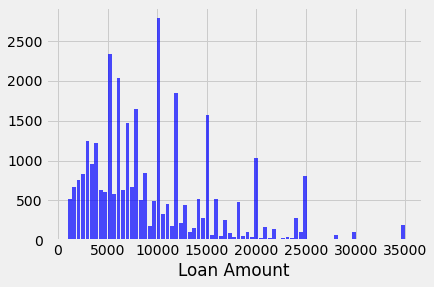

In [10]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x= df['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
;

''

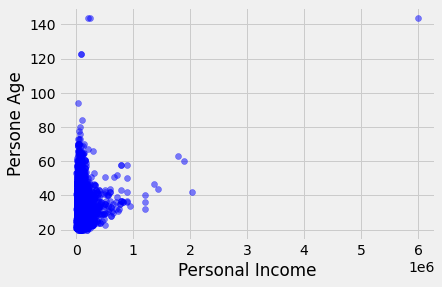

In [13]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
;

In [15]:
"""
We can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.
"""

'\nWe can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.\n'

''

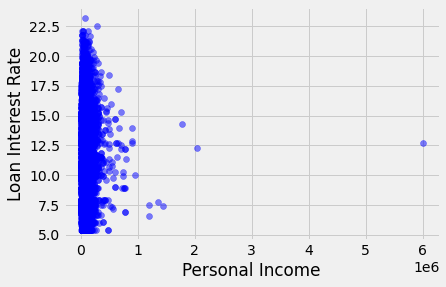

In [7]:
plt.scatter(df['person_income'], df['loan_int_rate'], c= 'blue', alpha= .5)
plt.xlabel('Personal Income')
plt.ylabel('Loan Interest Rate')
;

In [14]:
pd.crosstab(df['person_home_ownership'],
            df['loan_status'],
            values= df['loan_int_rate'],
            aggfunc= 'mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [17]:
pd.crosstab(df['loan_intent'], df['loan_status'], margins = True)

loan_status,0,1,All
loan_intent,,,
DEBTCONSOLIDATION,3722,1490,5212
EDUCATION,5342,1111,6453
HOMEIMPROVEMENT,2664,941,3605
MEDICAL,4450,1621,6071
PERSONAL,4423,1098,5521
VENTURE,4872,847,5719
All,25473,7108,32581


In [19]:
pd.crosstab(df['person_home_ownership'],[df['loan_status'],df['loan_grade']])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

In [41]:
df['person_home_ownership'].value_counts(dropna= False)

RENT        14890
MORTGAGE    12118
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

In [20]:
pd.crosstab(df['person_home_ownership'], df['loan_status'],
              values=df['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


Text(0.5, 0.98, '')

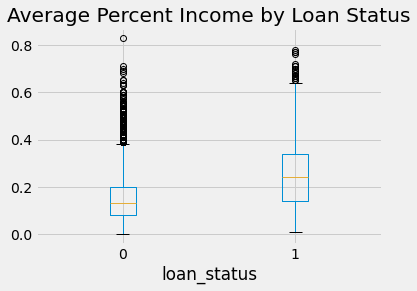

In [24]:
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')

In [25]:
"""
It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.
"""

"\nIt looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.\n"

In [27]:
ix = df[df['person_emp_length'] > 60].index
df = df.drop(ix)

In [29]:
pd.crosstab(df['loan_status'],df['person_home_ownership'],
            values=df['person_emp_length'], aggfunc=['min','max'])

KeyError: '__dummy__'

Text(0, 0.5, 'Loan Amount')

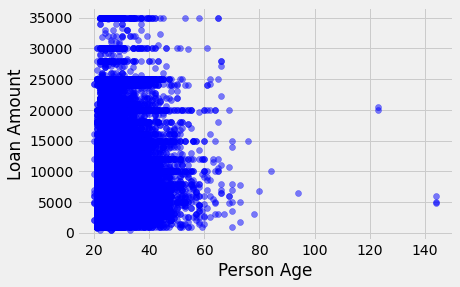

In [30]:
plt.scatter(df['person_age'], df['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")

''

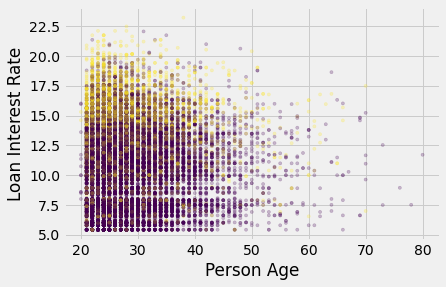

In [36]:
df = df.drop(df[df['person_age'] > 80].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(df['person_age'], df['loan_int_rate'],
            c = df['loan_status'],
            s = 10,
            #cmap = matplotlib.colors.ListedColormap(colors),
            alpha= 0.25)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
;

In [33]:
"""
 it looks like there are more defaults with high interest rates.
 """

'\n it looks like there are more defaults with high interest rates.\n '

In [ ]:
"""
It's also important to check the distribution of that feature to see if it changed.
"""
m = df['loan_int_rate'].mean()
df['loan_int_rate'].fillna(m) # inplace= True

Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.

## Logistic regression

In [54]:
df = pd.read_csv('./cr_loan_nout_nmiss.csv')
df.shape

(29459, 12)

In [57]:
# Create the X and y data sets
X = df[['loan_int_rate']]
y = df[['loan_status']]

# Create and fit a logistic regression model
clf = LogisticRegression()
clf.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf.get_params())
print(clf.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


In [58]:
# Create X data for the model
X2 = df[['loan_int_rate','person_emp_length']]

# Create and train a new logistic regression
clf2 = LogisticRegression(solver='lbfgs').fit(X2, np.ravel(y))

clf2.intercept_

array([-4.21645549])

In [59]:
"""
Take a closer look at each model's .intercept_ value. The values have changed! The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.
"""

"\nTake a closer look at each model's .intercept_ value. The values have changed! The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.\n"

In [62]:
# Create the X and y data sets
X = df[['loan_int_rate','person_emp_length', 'person_income']]
y = df[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


In [63]:
"""
Do you see that three columns were used for training and there are three values in .coef_? This tells you how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate.
"""

'\nDo you see that three columns were used for training and there are three values in .coef_? This tells you how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate.\n'

In [64]:
# Create two data sets for numeric and non-numeric data
cred_num = df.select_dtypes(exclude=['object'])
cred_str = df.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
df = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(df.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [65]:
"""
Look at all those columns! If you've ever seen a credit scorecard, the column_name_value format should look familiar. If you haven't seen one, look up some pictures during your next break!
"""

"\nLook at all those columns! If you've ever seen a credit scorecard, the column_name_value format should look familiar. If you haven't seen one, look up some pictures during your next break!\n"

In [75]:
var_target = 'loan_status'
X = df.drop([var_target], axis= 1)
y = df[var_target]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [76]:
# Train the logistic regression model on the training data
clf = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)

,loan_status,prob_default
0,1,0.445779
1,1,0.223447
2,0,0.288558
3,0,0.169358
4,1,0.114182


In [77]:
"""
We have some predictions now, but they don't look very accurate do they? It looks like most of the rows with loan_status at 1 have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.
"""

"\nWe have some predictions now, but they don't look very accurate do they? It looks like most of the rows with loan_status at 1 have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.\n"

In [78]:
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
threshold  = .5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > threshold else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    11175
1      609
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [79]:
"""
Well isn't this a surprise! It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.
"""

"\nWell isn't this a surprise! It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.\n"

In [81]:
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586], dtype=int64))


In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

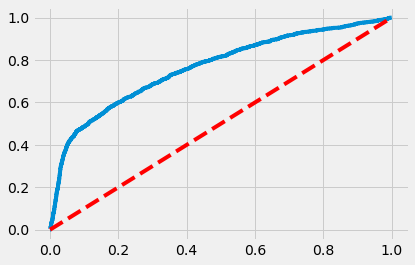

In [87]:
fallout, sensitivity, thresholds = roc_curve(y_test, preds_df['prob_default'])
plt.plot(fallout, sensitivity)
plt.plot([0, 1], [0, 1], 'r--')

0.8025288526816021


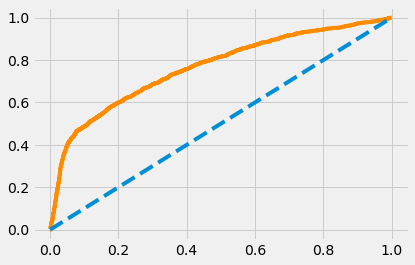

In [93]:
# Create predictions and store them in a variable
preds = clf.predict_proba(X_test)

# Print the accuracy score the model
print(clf.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

I wasn't worried about your .score() on this exercise! So the accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

In [96]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .5 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[9023  175]
 [2152  434]]


In [97]:
# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[8476  722]
 [1386 1200]]


0.4 gives us the highest value for default recall

In [98]:
preds_df['loan_status'].sum()

1922

In [104]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > .4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].sum()

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
avg_loan_amnt = 9583.6
print(num_defaults * avg_loan_amnt * (1 - default_recall) / 1e6)

9.872264258004641


By our estimates, this loss would be around $9.8 million. That seems like a lot! Try rerunning this code with threshold values of 0.3 and 0.5. Do you see the estimated losses changing? How do we find a good threshold value based on these metrics alone?

### Threshold selection

In [110]:
thresh = np.linspace(.2, .65, 19)
thresh

array([0.2  , 0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  ,
       0.425, 0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625,
       0.65 ])

In [125]:
def get_scores(thresh):
    # Reassign the values of loan status based on the new threshold
    preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    
    # Accuracy
    acc = accuracy_score(y_test, preds_df['loan_status'])

    # Store the default recall from the classification report
    recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1]
    nondef_rec, def_rec = recall[0], recall[1]
    return nondef_rec, def_rec, acc

In [129]:
scores = [get_scores(t) for t in thresh]

def_recalls = [elm[1] for elm in scores]
nondef_recalls = [elm[0] for elm in scores]
accs = [elm[2] for elm in scores]

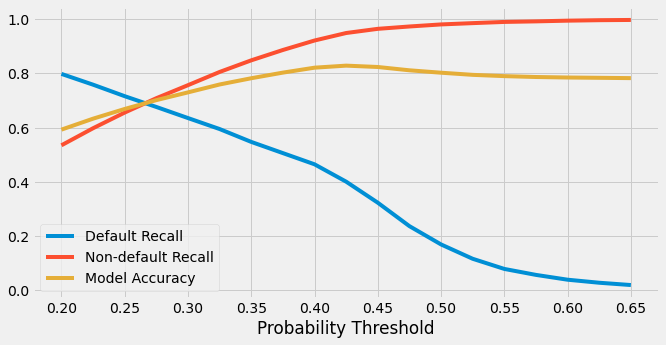

In [138]:
plt.figure(figsize= (10, 5))
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(np.linspace(.2, .65, 10))
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

Have a closer look at this plot. In fact, expand the window to get a really good look. Think about the threshold values from thresh and how they affect each of these three metrics. Approximately what starting threshold value would maximize these scores evenly?

This is the easiest pattern to see on this graph, because it's the point where all three lines converge. This threshold would make a great starting point, but declaring all loans about 0.275 to be a default is probably not practical.

In [150]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])

# Concatenate and print the two data frames for comparison
preds_df = pd.concat([y_test.reset_index(drop = True), preds_df], axis = 1)
preds_df.head()

C:\Users\Heschmat\miniconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Heschmat\miniconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


,loan_status,prob_default
0,1,0.990942
1,1,0.983987
2,0,0.000807
3,0,0.001239
4,1,0.084892


In [157]:
gbt_preds = clf_gbt.predict(X_test)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9198
     Default       0.94      0.74      0.83      2586

    accuracy                           0.93     11784
   macro avg       0.94      0.86      0.89     11784
weighted avg       0.93      0.93      0.93     11784



C:\Users\Heschmat\miniconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Gradient boosted portfolio performance

At this point you've looked at predicting probability of default using both a LogisticRegression() and XGBClassifier(). You've looked at some scoring and have seen samples of the predictions, but what is the overall affect on portfolio performance? Try using expected loss as a scenario to express the importance of testing different models.

In [151]:
portfolio = pd.DataFrame({
    'xgb_prob_default': preds_df['prob_default'],
    'lgd': [.2] * preds_df.shape[0],
    'loan_amnt': X_test['loan_amnt'].values
})

portfolio.head(3)

,xgb_prob_default,lgd,loan_amnt
0,0.990942,0.2,15000
1,0.983987,0.2,11200
2,0.000807,0.2,15000


In [156]:
# Create expected loss columns for each model using the formula
portfolio['xgb_expected_loss'] = portfolio['xgb_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
#portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
#print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('XGB expected loss: ', portfolio['xgb_expected_loss'].sum().round(2))

XGB expected loss:  5383982.81


It looks like the total expected loss for the XGBClassifier() model is quite a bit lower. When we talk about accuracy and precision, the goal is to generate models which have a low expected loss. Looking at a classification_report() helps as well.

In [165]:
feature_weight = clf_gbt.get_booster().get_score(importance_type = 'weight')
#sorted(feature_weight, key= feature_weight.get)

feature_weight = pd.DataFrame({'feat': feature_weight.keys(), 'weight': feature_weight.values()})
feature_weight.sort_values('weight', ascending= False)

,feat,weight
2,person_income,722
1,loan_int_rate,503
18,loan_amnt,349
10,person_age,287
8,person_emp_length,286
0,loan_percent_income,262
16,cb_person_cred_hist_length,168
6,loan_intent_MEDICAL,63
11,person_home_ownership_RENT,57
5,loan_intent_DEBTCONSOLIDATION,53


So, the importance for loan_grade_F is only 9 in this case. This could be because there are so few of the F-grade loans. While the F-grade loans don't add much to predictions here, they might affect the importance of other training columns.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

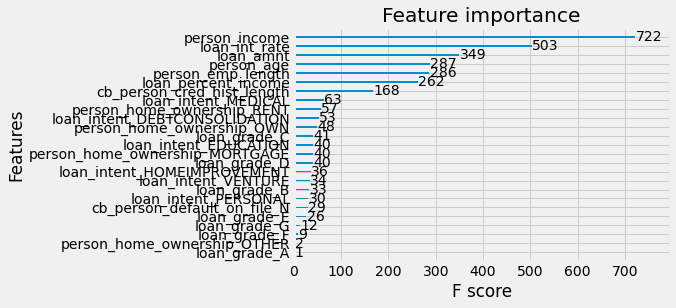

In [168]:
xgb.plot_importance(clf_gbt, importance_type= 'weight')

In [170]:
params = {'eval_metric': 'auc', 'objective': 'binary:logistic', 'seed': 123}
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label= y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain,
               num_boost_round= 5,
               nfold= n_folds,
               early_stopping_rounds= early_stopping)

cv_df

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.898182,0.001318,0.892519,0.004650
1,0.909256,0.002052,0.902780,0.005053
2,0.913621,0.002205,0.906834,0.004423
3,0.918600,0.001092,0.910779,0.005221
4,0.922252,0.001818,0.914193,0.004422


Do you see how the AUC for both train-auc-mean and test-auc-mean improves at each iteration of cross-validation? As the iterations progress the scores get better, but will they eventually reach 1.0?

In [180]:
"""
Here, cv() performed 150 iterations of cross-validation!
The parameter shuffle tells the function to shuffle the records each time.
"""
cv_big = xgb.cv(params, DTrain,
                num_boost_round = 150,
                nfold= 10,
                shuffle = True)

In [181]:
cv_big.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.897568,0.000909,0.892900,0.008258
1,0.906985,0.002611,0.901162,0.007519
2,0.913678,0.001403,0.907910,0.007753
3,0.919123,0.000921,0.912130,0.007145
4,0.922864,0.001097,0.914962,0.006706


In [182]:
cv_big.tail()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
145,0.998628,0.000175,0.945097,0.004922
146,0.998649,0.000184,0.945100,0.004893
147,0.998679,0.000189,0.945020,0.004900
148,0.998710,0.000185,0.945007,0.004881
149,0.998744,0.000168,0.944957,0.004880


''

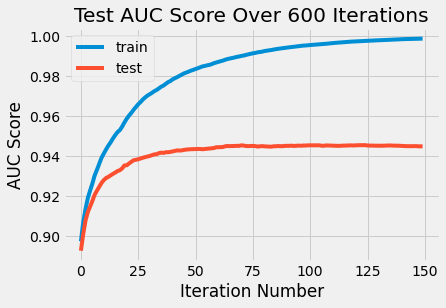

In [183]:
plt.plot(cv_big['train-auc-mean'], label= 'train')
plt.plot(cv_big['test-auc-mean'], label= 'test')
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('AUC Score')
plt.legend()
;

In [185]:
cv_big['test-auc-mean'].max(), cv_big['test-auc-mean'].argmax()

(0.94557, 124)

Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 124 iterations. This is because this much cross-validation can actually cause the model to become overfit. So, there is a limit to how much cross-validation you should to.

In [189]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = .1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print('=' * 50)
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

C:\Users\Heschmat\miniconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:22:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Heschmat\miniconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[22:22:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.94048427 0.93256393 0.93324282 0.92462653]
Average accuracy: 0.93 (

# Class imbalance in loan data
## Undersampling training data

In [190]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [191]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

0    3877
1    3877
Name: loan_status, dtype: int64


Now, our training set has an even number of defaults and non-defaults. Let's test out some machine learning models on this new undersampled data set and compare their performance to the models trained on the regular data set.

In [192]:
#@TODO fit the new model, and compare the results with that of original model

Undersampling the training data results in more false positives, but the recall for defaults and the AUC score are both higher than the original model. This means overall it predicts defaults much more accurately.

# Model Evaluation and Implementation